# Exploring Relationship Between Life Expendancy and GDP in Some Countries

#### Aproach

1. inspect the dataset
2. correlations
3. conclusions

#### Thoughout this process there will be added sections as the data anlyis brings up points of interest.


# Import libraries 

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

# Load the data

In [53]:
# Import Data
expentacy = pd.read_csv("all_data.csv")
expentacy.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [55]:
expentacy.info()
expentacy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


#### Countries in the study are:

In [56]:
country_values = expentacy['Country'].unique()
print(country_values)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


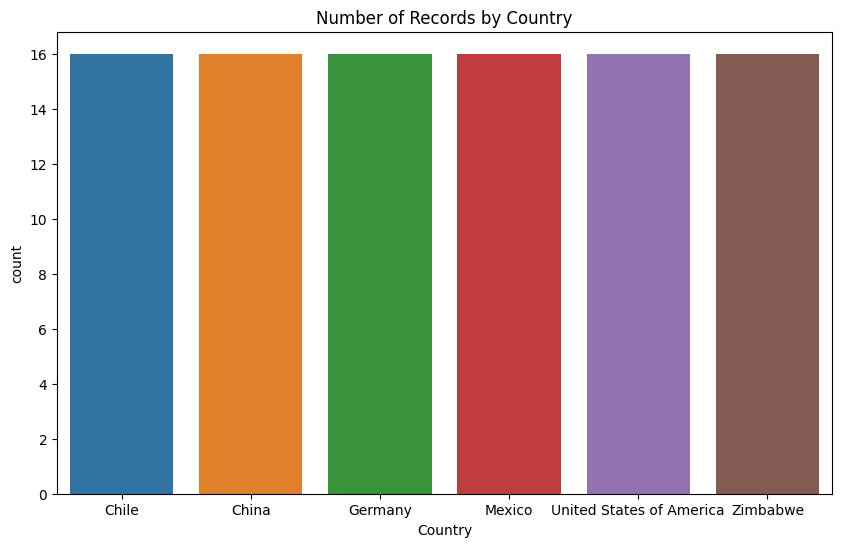

<Figure size 640x480 with 0 Axes>

In [67]:
#bar chart of the 'Country' column
plt.figure(figsize=(10,6))
sns.countplot(data= expentacy, x= 'Country')
plt.title("Number of Records by Country", loc='center')
plt.show()
plt.clf()

#### We have the same amount of observations by country

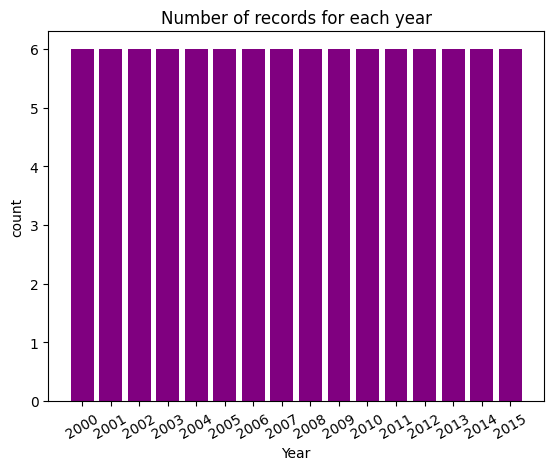

<Figure size 640x480 with 0 Axes>

In [75]:
years = expentacy["Year"].unique()
ax = plt.subplot()
plt.bar(range(len(years)), expentacy['Year'].value_counts(), color= 'Purple')
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=30)
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Number of records for each year')

plt.show()
plt.clf()


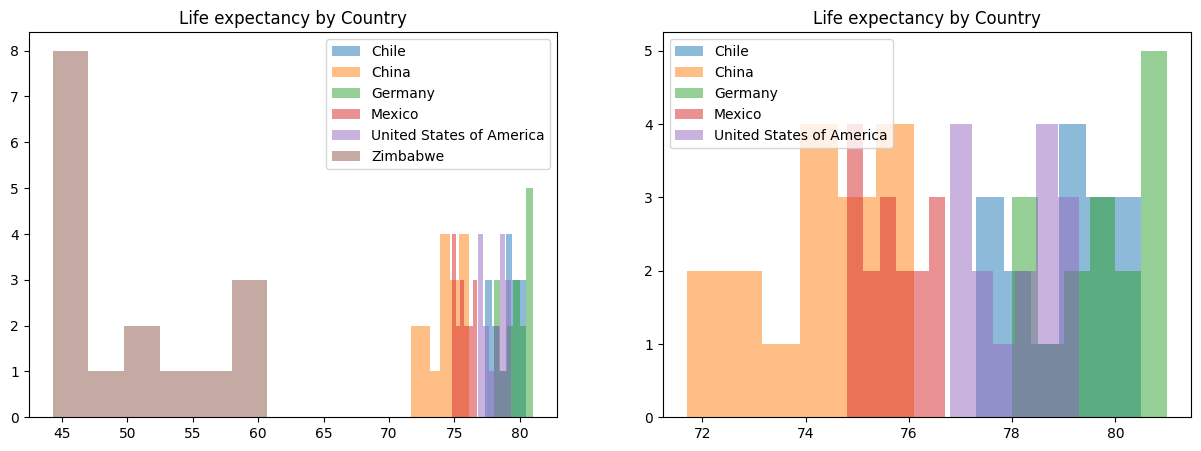

In [112]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
for i in range(len(country_values)):
    expentacy_filtered = expentacy[expentacy['Country'] == country_values[i]]
    plt.hist(expentacy_filtered['Life expectancy at birth (years)'], bins= len(country_values), alpha= 0.5, label= country_values[i])
plt.title("Life expectancy by Country")
plt.legend()


# Excluding Zimbabwe
plt.subplot(1,2,2)
for i in range(len(country_values)-1):
    expentacy_filtered = expentacy[expentacy['Country'] == country_values[i]]
    plt.hist(expentacy_filtered['Life expectancy at birth (years)'], bins= len(country_values), alpha= 0.5, label= country_values[i])
plt.title("Life expectancy by Country")
plt.legend()
plt.show()


#### Zimbabwe has a significant different distribution in terms of life expenctancy, its population doesn't reach even the 65 years old meanwhile in the rest of observed counties at minimum their life expectancy surpasse the 70 years old.

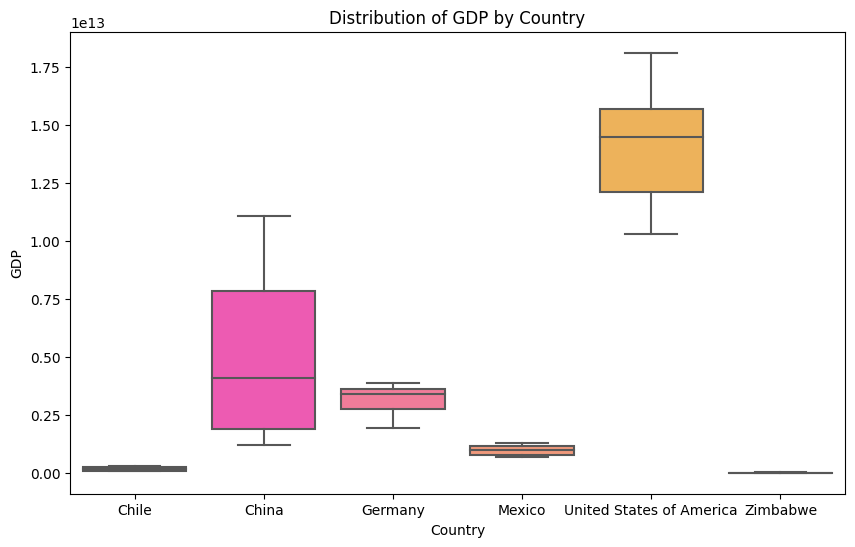

<Figure size 640x480 with 0 Axes>

In [113]:
countries = expentacy["Country"].unique()
plt.figure(figsize=(10,6))
sns.boxplot(expentacy, x= 'Country', y='GDP', palette= 'spring', saturation= 0.8)
plt.title("Distribution of GDP by Country")
plt.show()
plt.clf()


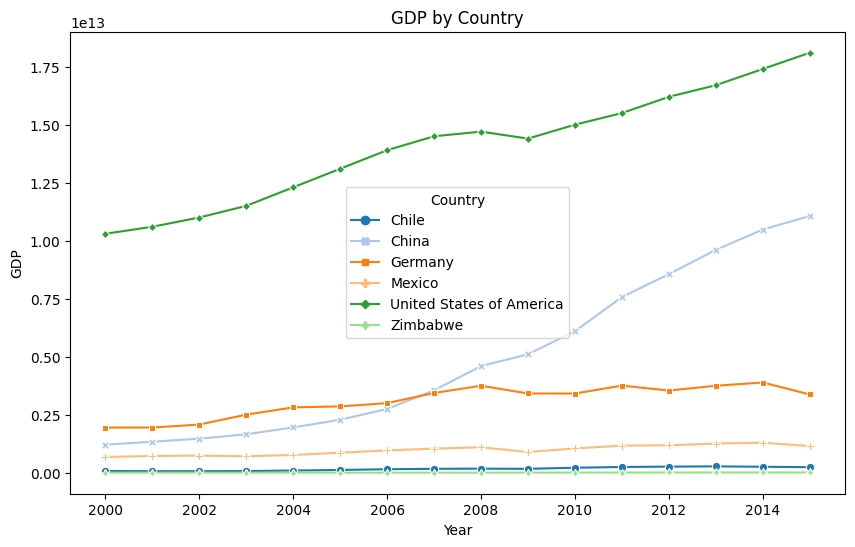

<Figure size 640x480 with 0 Axes>

In [102]:
palette = sns.color_palette("tab20", 6)
plt.figure(figsize= (10, 6))
sns.lineplot(data= expentacy, x= 'Year', y= 'GDP', hue= 'Country', palette= palette, markers= True, style= 'Country', dashes= False)
plt.title('GDP by Country')
plt.show()
plt.clf()

#### China has shown an increase on its GDP after 2007 even surpassing Germany and becoming the second largest economy after United States.
#### United States has increasing its GDP in a constant pacing, only decreasing between 2008 and 2009.
#### Mexico, Chile and Zimbabwe have been almost constant during the 16 observed years.

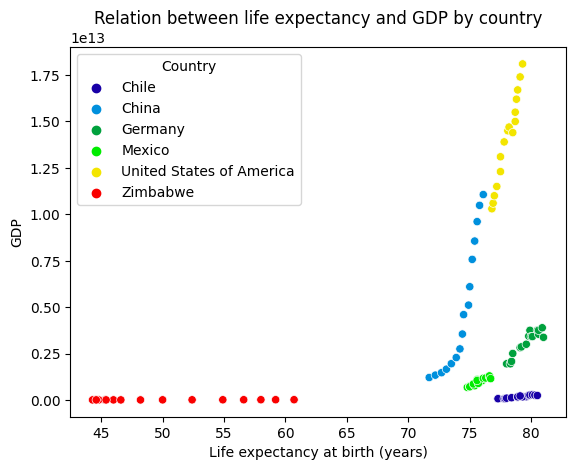

<Figure size 640x480 with 0 Axes>

In [115]:
sns.scatterplot(data = expentacy, x= 'Life expectancy at birth (years)', y= 'GDP', palette= 'nipy_spectral', hue= 'Country')
plt.title("Relation between life expectancy and GDP by country")
plt.show()
plt.clf()



#### This chart show us that not necessairly the life expectancy depends on the GDP or vice versa for all the observed countries, in this case it should be useful to analize the pearson coeficient individually.

In [120]:
for i in range(len(countries)):
    expentacy_filtered = expentacy[expentacy['Country'] == country_values[i]]
    correlation, r = pearsonr(x= expentacy_filtered["GDP"], y= expentacy_filtered["Life expectancy at birth (years)"])
    print(f"correlation of GDP and Life Expectancy for {country_values[i]} is {correlation.round(2)}")


correlation of GDP and Life Expectancy for Chile is 0.95
correlation of GDP and Life Expectancy for China is 0.91
correlation of GDP and Life Expectancy for Germany is 0.93
correlation of GDP and Life Expectancy for Mexico is 0.93
correlation of GDP and Life Expectancy for United States of America is 0.98
correlation of GDP and Life Expectancy for Zimbabwe is 0.97


#### After seeing the pearson coeficient for each country the conclusion is different, we can observed a significant positive relationship between GDP and Life Expectancy, all observed countries showed a pearson value higher than 0.9, a good conclusion here is that even though data visualization is an amazinf support for exploring data, sometimes the graph scales may bias the analysis.